In [1]:
import sys
import logging
import random

import pandas as pd
import matplotlib.pyplot as plt
import cstrees.cstree as ct
import cstrees.scoring as sc
import cstrees.stage as st
import cstrees.learning as ctl
import networkx as nx
import numpy as np
import pp

%load_ext autoreload
%autoreload 2
# logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)
logging.basicConfig(stream=sys.stderr, level=logging.ERROR)

   a  b  c PROB_0 PROB_1
0  2  2  2    NaN    NaN
1  *  -  -    NaN    NaN
2  0  0  -    NaN    NaN
3  0  1  -    NaN    NaN
4  1  0  -    NaN    NaN
5  1  1  -    NaN    NaN
6  -  -  -    NaN    NaN
   a  b  c    PROB_0    PROB_1
0  2  2  2       NaN       NaN
1  *  -  -  0.724974  0.275026
2  0  0  -  0.368882  0.631118
3  0  1  -  0.077025  0.922975
4  1  0  -  0.261960  0.738040
5  1  1  -  0.793895  0.206105
6  -  -  -  0.495328  0.504672


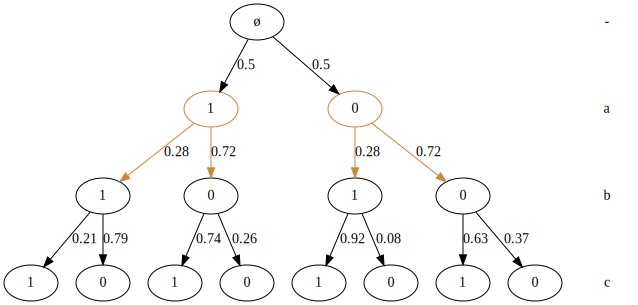

In [2]:
np.random.seed(50)
tree = ct.CStree([2] * 3, labels=["a", "b", "c"])

# V-structure
tree.update_stages(
    {
        0: [st.Stage([{0, 1}])],
        1: [st.Stage([0, 0]), st.Stage([0, 1]), st.Stage([1, 0]), st.Stage([1, 1])],
    }
)

print(tree.to_df(write_probs=True))

tree.sample_stage_parameters(alpha=1.0)
print(tree.to_df(write_probs=True))
a = tree.plot(full=True)
x = tree.sample(5000)

true_cdags = tree.to_minimal_context_graphs()
ct.write_minimal_context_graphs_to_files(true_cdags, prefix="sandbox_")
a

In [3]:
tdf = tree.to_df(write_probs=True)
tdf

,a,b,c,PROB_0,PROB_1
0,2,2,2,NaN,NaN
1,*,-,-,0.724974,0.275026
2,0,0,-,0.368882,0.631118
3,0,1,-,0.077025,0.922975
4,1,0,-,0.261960,0.738040
5,1,1,-,0.793895,0.206105
6,-,-,-,0.495328,0.504672


In [4]:
dftree = ct.df_to_cstree(tdf)
dftree.to_df(write_probs=True)

,a,b,c,PROB_0,PROB_1
0,2,2,2,NaN,NaN
1,*,-,-,0.724974,0.275026
2,0,0,-,0.368882,0.631118
3,0,1,-,0.077025,0.922975
4,1,0,-,0.261960,0.738040
5,1,1,-,0.793895,0.206105
6,-,-,-,0.495328,0.504672


Use plot(full=True) to draw the full tree.


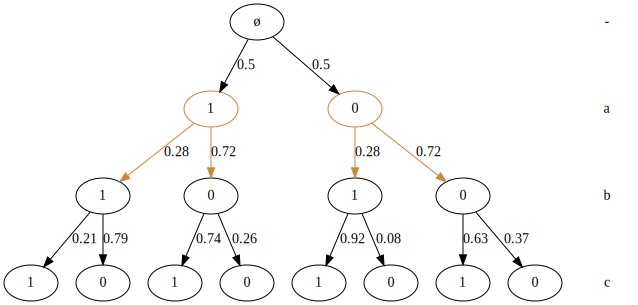

In [5]:
dftree.plot()

Use plot(full=True) to draw the full tree.


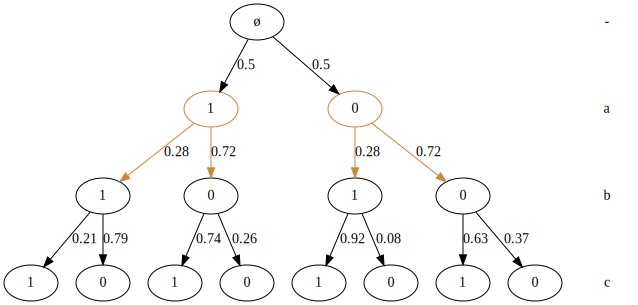

In [6]:
tree.estimate_stage_parameters(x)
tree.plot()

Order score tables: 100%|██████████| 3/3 [00:00<00:00, 2055.70it/s]

optimal order: ['a', 'b', 'c'], score -9249.37276957637


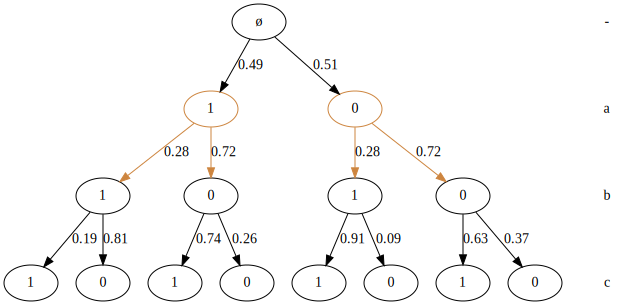

In [7]:
score_table, context_scores, context_counts = sc.order_score_tables(
    x, max_cvars=2, alpha_tot=1.0, method="BDeu"
)
optord, score = ctl._find_optimal_order(score_table)
print("optimal order: {}, score {}".format(optord, score))

opttree = ctl._optimal_cstree_given_order(optord, context_scores)

opttree.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
opttree.plot(full=True)

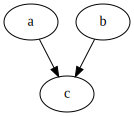

In [8]:
opt_cdags = opttree.to_minimal_context_graphs()
for key, val in opt_cdags.items():
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("./" + str(key) + "_opt.png", args='-Glabel="' + str(key) + '"   ')

agraph

In [9]:
tree = ctl.find_optimal_cstree(x, max_cvars=2, alpha_tot=1.0, method="BDeu")

tree.to_df()

Context score tables:   0%|          | 0/3 [00:00<?, ?it/s]

Order score tables: 100%|██████████| 3/3 [00:00<00:00, 2551.28it/s]


,a,b,c
0,2,2,2
1,*,-,-
2,0,0,-
3,0,1,-
4,1,0,-
5,1,1,-
6,-,-,-


In [10]:
orders2, scores2 = ctl.gibbs_order_sampler(2000, score_table)

Gibbs order sampler: 100%|██████████| 2000/2000 [00:00<00:00, 21080.14it/s]


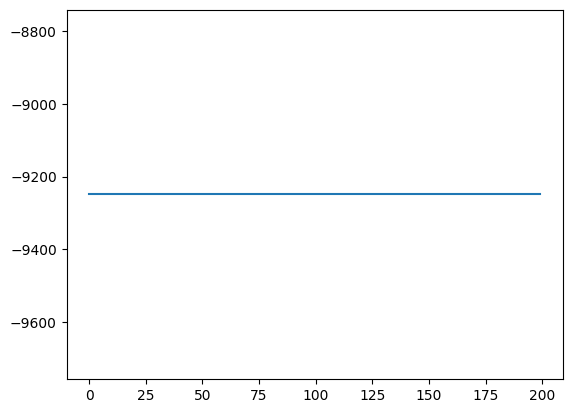

In [11]:
plt.plot(scores2[:200])

In [12]:
# Get the individual var locations on the order
var_positions = {var: [x.index(var) for x in orders2] for var in orders2[0]}
var_positions["iteration"] = list(range(len(orders2)))
plotdf = pd.DataFrame(var_positions)

In [13]:
plotdf[100:200].plot(x="iteration", y=range(p), yticks=range(len(orders2[0])))

NameError: name 'p' is not defined

In [ ]:
max(scores2)

-9255.568742431758

In [ ]:
maxi = scores2.index(max(scores2))

In [ ]:
maporder = orders2[maxi]
maporder

[1, 0, 2]

In [ ]:
opttree = ctl._optimal_cstree_given_order(maporder, context_scores)

# for lev, staging in opttree.stages.items():
#   print(lev)
#   for stage in staging:
#     print(stage.color)
opttree.labels

[1, 0, 2]

In [ ]:
opttree.estimate_stage_parameters(x2, alpha_tot=2.0, method="BDeu")
opttree.plot()

Use plot(full=True) to draw the full tree.


In [ ]:
agraphs = opttree.to_minimal_context_agraphs()

None


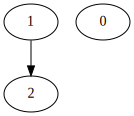

In [ ]:
keys = list(agraphs.keys())
print(keys[0])
agraphs[keys[0]]